In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras import layers

In [34]:
data = pd.read_csv("age_gender.csv")
data.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [24]:
data["gender"].value_counts()

0    12391
1    11314
Name: gender, dtype: int64

In [25]:
data["ethnicity"].value_counts()

0    10078
1     4526
3     3975
2     3434
4     1692
Name: ethnicity, dtype: int64

In [26]:
data["age"].sort_values

<bound method Series.sort_values of 0         1
1         1
2         1
3         1
4         1
         ..
23700    99
23701    99
23702    99
23703    99
23704    99
Name: age, Length: 23705, dtype: int64>

(array([1.605e+03, 2.890e+02, 2.730e+02, 1.960e+02, 1.310e+02, 1.390e+02,
        4.290e+02, 1.560e+02, 6.500e+01, 1.300e+02, 8.100e+01, 1.570e+02,
        4.240e+02, 1.580e+02, 2.620e+02, 9.800e+01, 2.840e+02, 3.460e+02,
        8.210e+02, 8.590e+02, 7.340e+02, 2.197e+03, 6.150e+02, 9.180e+02,
        1.294e+03, 3.500e+02, 6.640e+02, 1.430e+02, 4.090e+02, 8.800e+02,
        7.760e+02, 3.250e+02, 2.650e+02, 5.260e+02, 1.320e+02, 2.660e+02,
        1.570e+02, 5.400e+02, 1.530e+02, 1.700e+02, 1.530e+02, 1.480e+02,
        3.810e+02, 3.700e+02, 2.410e+02, 3.530e+02, 2.680e+02, 2.360e+02,
        9.700e+01, 3.530e+02, 2.930e+02, 1.590e+02, 1.250e+02, 1.030e+02,
        5.000e+01, 3.360e+02, 9.400e+01, 1.000e+02, 5.600e+01, 1.470e+02,
        3.300e+01, 1.610e+02, 3.200e+01, 1.480e+02, 5.800e+01, 2.800e+01,
        6.900e+01, 2.300e+01, 1.550e+02, 4.000e+01, 1.800e+01, 2.400e+01,
        1.550e+02, 3.500e+01, 4.400e+01, 3.300e+01, 8.200e+01, 2.000e+00,
        1.300e+01, 5.000e+00, 9.000e+0

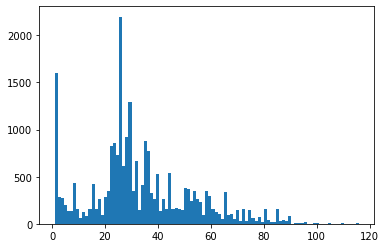

In [27]:
plt.hist(np.array(data["age"]), bins=99)

In [35]:
data = data[data['age'] <= 90]
#data.head()

In [36]:
data = data[data['age'] >= 15]

(array([ 424.,  158.,  262.,   98.,  284.,  346.,  395.,  426.,  859.,
         734., 2197.,  615.,  918.,  570., 1074.,  664.,  143.,  409.,
         880.,  483.,  293.,  325.,  265.,  526.,  132.,  266.,  157.,
         100.,  593.,  170.,  153.,  148.,  381.,  138.,  232.,  241.,
         353.,  268.,  236.,   97.,  271.,   82.,  452.,  125.,  103.,
          50.,  259.,   77.,   94.,  100.,   56.,  147.,   33.,   98.,
          63.,   32.,  206.,   28.,   69.,   23.,  133.,   22.,   40.,
          18.,   24.,  155.,   35.,   10.,   34.,  115.]),
 array([15.        , 16.07142857, 17.14285714, 18.21428571, 19.28571429,
        20.35714286, 21.42857143, 22.5       , 23.57142857, 24.64285714,
        25.71428571, 26.78571429, 27.85714286, 28.92857143, 30.        ,
        31.07142857, 32.14285714, 33.21428571, 34.28571429, 35.35714286,
        36.42857143, 37.5       , 38.57142857, 39.64285714, 40.71428571,
        41.78571429, 42.85714286, 43.92857143, 45.        , 46.07142857,
      

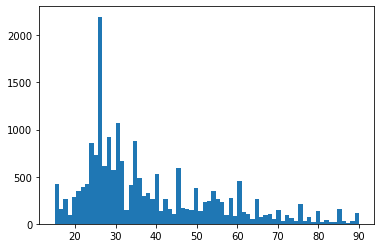

In [37]:
plt.hist(np.array(data["age"]), bins=70)

In [38]:
x = data["pixels"]

In [39]:
y_age = np.array(data["age"])
y_gender = data["gender"]

In [40]:
y_age

array([15, 15, 15, ..., 90, 90, 90])

In [41]:
len(x[0].split(' '))

KeyError: 0

In [19]:
np.sqrt(len(x[0].split(' ')))

KeyError: 0

In [13]:
num_pixels = 2304
img_height = 48
img_width = 48

In [42]:
x = x.apply(lambda x: x.split(' '))
x = x.apply(lambda x: np.array(list(map(lambda z: np.int(z), x))))
x = np.array(x)
x = np.stack(np.array(x), axis=0)
x = np.reshape(x, (-1, 48, 48))

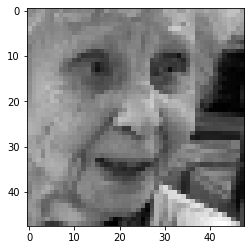

In [43]:
x_num = 19903
plt.imshow(x[x_num], cmap="gray")
plt.show()

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y_age, test_size=0.2, random_state=1)

In [45]:
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

In [46]:
#y_test = OneHotEncoder().fit_transform(y_test.reshape(-1,1)).toarray()
y_test = y_test.astype(np.float32)

#y_train = OneHotEncoder().fit_transform(y_train.reshape(-1,1)).toarray()
y_train = y_train.astype(np.float32)

print("y_test.shape: ", y_test.shape)
print("y_train.shape: ", y_train.shape)

y_test.shape:  (3994,)
y_train.shape:  (15973,)


In [47]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [48]:
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

In [49]:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)

x_train shape:  (15973, 48, 48)
x_test shape:  (3994, 48, 48)


Label:  0


<Figure size 432x288 with 0 Axes>

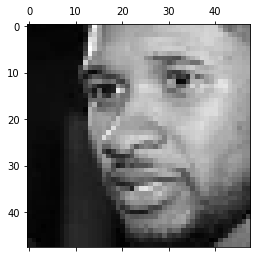

In [50]:
n = 2376
plt.gray()
plt.matshow(x_train[n])
print("Label: ", np.argmax(y_train[n]))

In [51]:
x_train.shape

(15973, 48, 48)

In [52]:
x_train = x_train.reshape(-1,48,48,1)

In [53]:
model_age = tf.keras.Sequential()
model_age.add(layers.InputLayer(input_shape=x_train.shape[1:]))
model_age.add(layers.Conv2D(filters=16, kernel_size=3, strides=1, padding="SAME", activation="relu"))
model_age.add(layers.MaxPool2D(pool_size=2, strides=2, padding="SAME"))
model_age.add(layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="SAME", activation="relu"))
model_age.add(layers.MaxPool2D(pool_size=2, strides=2, padding="SAME"))
#model_age.add(layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="SAME", activation="relu"))
#model_age.add(layers.MaxPool2D(pool_size=2, strides=2, padding="SAME"))
model_age.add(layers.Flatten())
model_age.add(layers.Dense(128))
model_age.add(layers.Dropout(0.2))
model_age.add(layers.Dense(units=1))

model_age.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [54]:
model_age.compile(
    optimizer="adam",
    loss='mean_squared_error',
    metrics=['mae']
)

In [55]:
history = model_age.fit(
    x=x_train,
    y=y_train,
    batch_size=100,
    epochs=50,
    validation_split=0.05
)

Epoch 1/50
152/152 [==============================] - 29s 190ms/step - loss: 332.0562 - mae: 14.2448 - val_loss: 263.5002 - val_mae: 12.8360
Epoch 2/50
152/152 [==============================] - 31s 201ms/step - loss: 202.4585 - mae: 11.0907 - val_loss: 182.0053 - val_mae: 10.7498
Epoch 3/50
152/152 [==============================] - 31s 205ms/step - loss: 173.4607 - mae: 10.2313 - val_loss: 180.8788 - val_mae: 10.9361
Epoch 4/50
152/152 [==============================] - 31s 204ms/step - loss: 165.6084 - mae: 10.0105 - val_loss: 156.3963 - val_mae: 9.8036
Epoch 5/50
152/152 [==============================] - 32s 209ms/step - loss: 151.8795 - mae: 9.6001 - val_loss: 151.2883 - val_mae: 9.3576
Epoch 6/50
152/152 [==============================] - 32s 208ms/step - loss: 149.1043 - mae: 9.4973 - val_loss: 147.6568 - val_mae: 9.2124
Epoch 7/50
152/152 [==============================] - 31s 205ms/step - loss: 140.6990 - mae: 9.2355 - val_loss: 133.8315 - val_mae: 8.8390
Epoch 8/50
152/152 [

In [56]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [57]:
x_test = x_test.reshape(-1,48,48,1)

In [58]:
y_pred = model_age.predict(x_test)

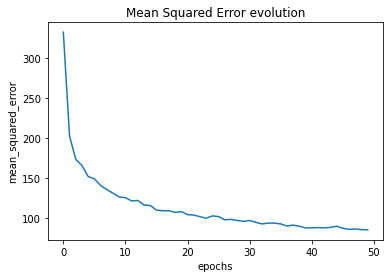

In [59]:
plt.plot(history.history['loss'])
plt.xlabel("epochs")
plt.ylabel("mean_squared_error")
plt.title("Mean Squared Error evolution")
plt.show()

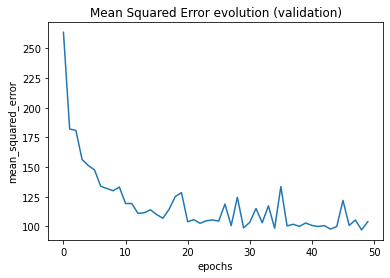

In [60]:
plt.plot(history.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("mean_squared_error")
plt.title("Mean Squared Error evolution (validation)")
plt.show()

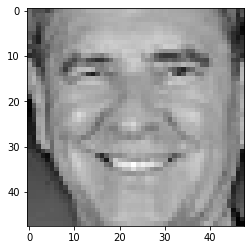

In [61]:
num = 1456
plt.imshow(x_test[num].reshape(48,48), cmap="gray")
plt.show()

In [62]:
x1 = x_test[num].reshape(1,48,48,1)

In [63]:
y1 = model_age.predict(x1)
y1

array([[55.71497]], dtype=float32)

In [64]:
y_test[num]

59.0

In [65]:
from sklearn.metrics import mean_squared_error as mse
RMSE = np.sqrt(mse(y_test, y_pred))
RMSE

10.242794

In [66]:
model_age.save('saved_model/model_age_no_children')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/model_age_no_children/assets
